In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

DATA_DIR = 'c:/source/ch06/'
os.listdir(DATA_DIR)

['test.csv', 'train.csv']

In [2]:
DATA_DIR = 'c:/source/ch06/'
data_files = sorted([os.path.join(DATA_DIR, filename)
for filename in os.listdir(DATA_DIR)], reverse=True)
data_files

['c:/source/ch06/train.csv', 'c:/source/ch06/test.csv']

In [3]:
# (1) 데이터프레임을 각 파일에서 읽어온 후 df_list에 추가
df_list = []
for filename in data_files:
    df_list.append(pd.read_csv(filename))
    
# (2) 두 개의 데이터프레임을 하나로 통합
df = pd.concat(df_list, sort=False)

# (3) 인덱스 초기화
df = df.reset_index(drop=True)

# (4) 결과 출력
df.head(5)

PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
# (1) train.csv 데이터의 수
number_of_train_dataset = df.Survived.notnull().sum()

# (2) test.csv 데이터의 수
number_of_test_dataset = df.Survived.isnull().sum()

# (3) train.csv 데이터의 y 값 추출
y_true = df.pop("Survived")[:number_of_train_dataset]

In [5]:
df.head(2).T

0  \
PassengerId                        1   
Pclass                             3   
Name         Braund, Mr. Owen Harris   
Sex                             male   
Age                             22.0   
SibSp                              1   
Parch                              0   
Ticket                     A/5 21171   
Fare                            7.25   
Cabin                            NaN   
Embarked                           S   

                                                             1  
PassengerId                                                  2  
Pclass                                                       1  
Name         Cumings, Mrs. John Bradley (Florence Briggs Th...  
Sex                                                     female  
Age                                                       38.0  
SibSp                                                        1  
Parch                                                        0  
Ticket                                                PC 17599  
Fare                                                   71.2833  
Cabin                                                      C85  
Embarked                                                     C

In [6]:
# (1) 데이터를 소수점 두 번째 자리까지 출력
pd.options.display.float_format = '{:.2f}'.format

# (2) 결측치 값의 합을 데이터의 개수로 나눠 비율로 출력
df.isnull().sum() / len(df) * 100

PassengerId    0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age           20.09
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.08
Cabin         77.46
Embarked       0.15
dtype: float64

In [7]:
df[df["Age"].notnull()].groupby(
    ["Sex"])["Age"].mean()

Sex
female   28.69
male     30.59
Name: Age, dtype: float64

In [8]:
df[df["Age"].notnull()].groupby(
    ["Pclass"])["Age"].mean()

Pclass
1   39.16
2   29.51
3   24.82
Name: Age, dtype: float64

In [9]:
df["Age"].fillna(
    df.groupby("Pclass")["Age"].transform("mean"), inplace=True)

df.isnull().sum() / len(df) * 100

PassengerId    0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age            0.00
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.08
Cabin         77.46
Embarked       0.15
dtype: float64

In [10]:
df.loc[61,"Embarked"] = "S"
df.loc[829,"Embarked"] = "S"

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1309 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [12]:
object_columns = ["PassengerId", "Pclass", "Name", "Sex",
                  "Ticket", "Cabin", "Embarked"]
numeric_columns = ["Age", "SibSp", "Parch", "Fare"]

for col_name in object_columns:
    df[col_name] = df[col_name].astype(object)
    
for col_name in numeric_columns:
    df[col_name] = df[col_name].astype(float)
    
df["Parch"] = df["Parch"].astype(int)
df["SibSp"] = df["SibSp"].astype(int)

In [13]:
def merge_and_get(ldf, rdf, on, how="inner", index=None):
    if index is True:
        return pd.merge(ldf,rdf, how=how, left_index=True,
                        right_index=True)
    else:
        return pd.merge(ldf,rdf, how=how, on=on)

In [14]:
one_hot_df = merge_and_get(
    df, pd.get_dummies(df["Sex"], prefix="Sex"), on=None, index=True)
one_hot_df = merge_and_get(
    one_hot_df, pd.get_dummies(
        df["Pclass"], prefix="Pclass"), on=None, index=True)
one_hot_df = merge_and_get(
    one_hot_df, pd.get_dummies(
        df["Embarked"], prefix="Embarked"), on=None, index=True)

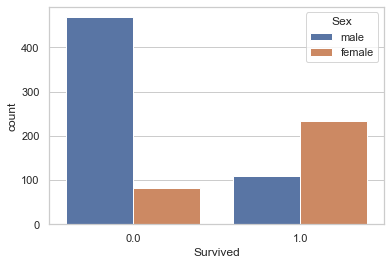

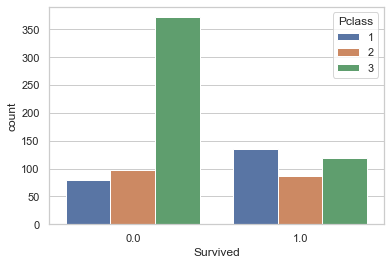

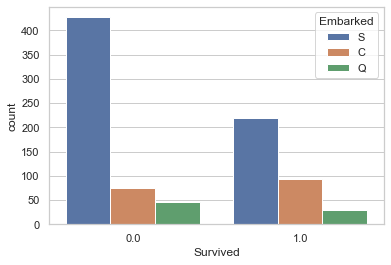

In [15]:
temp_columns = ["Sex", "Pclass", "Embarked"]

for col_name in temp_columns:
    temp_df = pd.merge(
        one_hot_df[col_name], y_true, left_index=True, right_index=True)
    sns.countplot(x="Survived", hue=col_name, data=temp_df)
    plt.show()

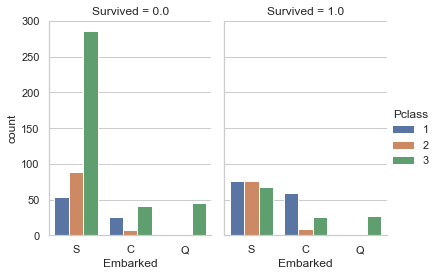

In [16]:
temp_df = pd.merge(one_hot_df[temp_columns],
                   y_true, left_index=True,
                   right_index=True)
g = sns.catplot(x="Embarked",
                hue="Pclass",
                col="Survived",
                data=temp_df,
                kind="count",
                height=4, aspect=.7);

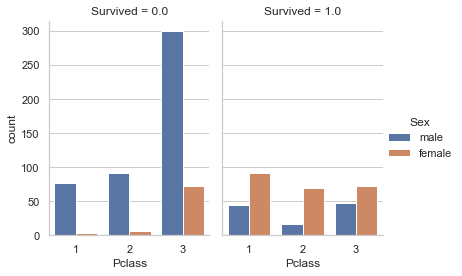

In [17]:
temp_df = pd.merge(
    one_hot_df[temp_columns],
    y_true, left_index=True,
    right_index=True)
g = sns.catplot(x="Pclass",
                hue="Sex", col="Survived",
                data=temp_df, kind="count",
                height=4, aspect=.7)

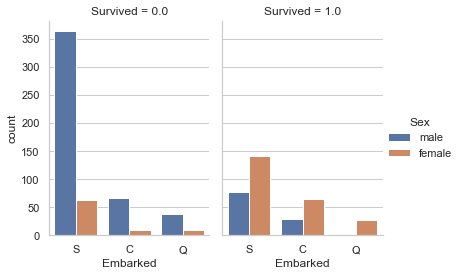

In [18]:
temp_df = pd.merge(
    one_hot_df[temp_columns],
    y_true, left_index=True,
    right_index=True)

g = sns.catplot(
    x="Embarked", hue="Sex",
    col="Survived",
    data=temp_df, kind="count",
    height=4, aspect=.7);

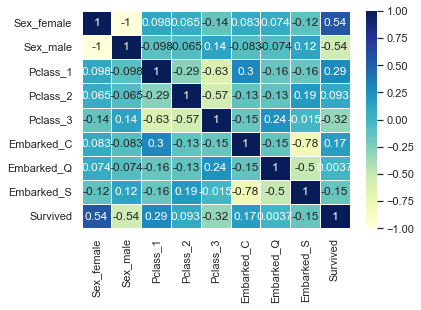

In [19]:
crosscheck_columns = [col_name for col_name in one_hot_df.columns.tolist()
if col_name.split("_")[0] in temp_columns and "_" in col_name ] + ["Sex"]

# temp열
temp_df = pd.merge(one_hot_df[crosscheck_columns], y_true,
                   left_index=True, right_index=True)

corr = temp_df.corr()
sns.set()
ax = sns.heatmap(corr, annot=True, linewidths=.5, cmap="YlGnBu")